In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress, skew
import string
import datetime
from matplotlib.gridspec import GridSpec


(c1,c2,c3,c4)=('#1b9e77','#d95f02','#7570b3','#e7298a')
colors = [c2,c3,c1]

In [5]:
met_dict = pickle.load(open('met_dict.p','rb'))

In [106]:
df = pickle.load(open('big_df.p','rb'))

print(df.shape[0])
df = df[df['zenith']<90]
print(df.shape[0])


101780
23763


In [107]:
df_cloudy_low = df[df['Low cloudiness']>9]
df_clear_total = df[df['Total cloudiness']<1]
df_clear_low = df[df['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>9]

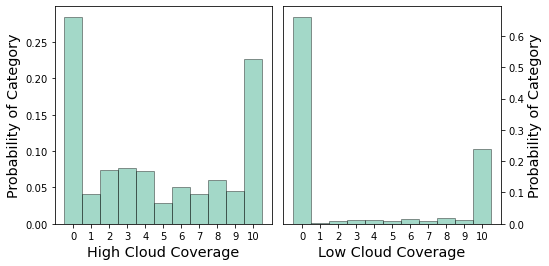

In [108]:
fig, axs = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = axs.reshape(-1)

alpha=0.4
bw = 0.2
bins=np.arange(-5,5,bw)

## AX1

p,x = np.histogram(df['Total cloudiness'][df['Low cloudiness']<1],bins=np.arange(-0.5,11,1),density=True)
ax1.bar(x[:-1]+0.5,p,color=c1,edgecolor='k',width=1,alpha=alpha)

ax1.set_xticks(np.arange(0,11,1))
ax1.set_ylabel('Probability of Category',fontsize='x-large')
ax1.set_xlabel('High Cloud Coverage',fontsize='x-large')

# AX2

p,x = np.histogram(df['Low cloudiness'],bins=np.arange(-0.5,11,1),density=True)
ax2.bar(x[:-1]+0.5,p,color=c1,edgecolor='k',width=1,alpha=alpha)

ax2.set_xticks(np.arange(0,11,1))
ax2.set_ylabel('Probability of Category',fontsize='x-large')
ax2.set_xlabel('Low Cloud Coverage',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

plt.subplots_adjust(wspace=0.05)

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/supp_figs/cloud_cover.png',dpi=400,bbox_inches='tight')

High cloud mean: -0.2615154536390828
High cloud skew: -0.47889586355380914
Clear sky mean: -0.07197889182058047
Clear sky skew: -0.6938555449395206
Low cloud mean: -0.55625
Low cloud skew: -0.6593864824282512
Clear sky mean: -0.07197889182058047
Clear sky skew: -0.6938555449395206
LinregressResult(slope=0.07675006880002554, intercept=-6.933941239243358, rvalue=0.38064723647138676, pvalue=2.686133228384672e-183, stderr=0.002554852989260741, intercept_stderr=0.21271332521395753)
LinregressResult(slope=0.12777984379706261, intercept=-10.703270509457077, rvalue=0.5390067638097362, pvalue=2.0501559025359634e-226, stderr=0.003641404836953085, intercept_stderr=0.29838497939693626)
LinregressResult(slope=0.21031321822922153, intercept=-17.08102000483366, rvalue=0.5841193799955785, pvalue=0.0, stderr=0.004748301237229435, intercept_stderr=0.385033078651687)


/tmp/ipykernel_19799/1432359861.py:157: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.05,hspace=0.0)


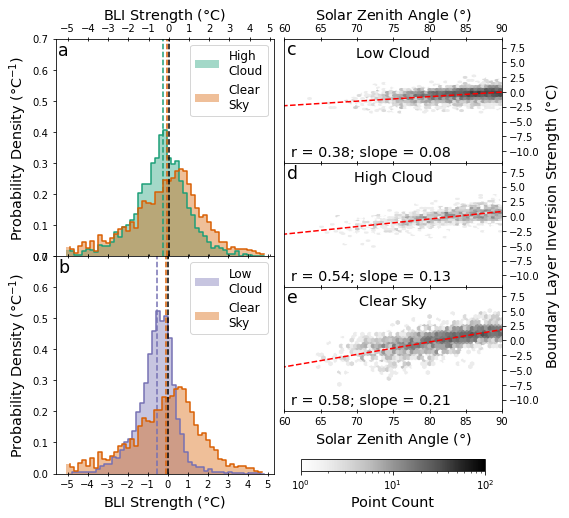

In [109]:
fig = plt.figure(constrained_layout=True,figsize=(8,8))

x=2
gs = GridSpec(14*x, 2, figure=fig)

ax1 = fig.add_subplot(gs[:7*x,0])
ax2 = fig.add_subplot(gs[7*x:14*x,0])
ax3 = fig.add_subplot(gs[:4*x,1])
ax4 = fig.add_subplot(gs[4*x:8*x,1])
ax5 = fig.add_subplot(gs[8*x:12*x,1])
# ax6 = fig.add_subplot(gs[13*x:14*x,1])

# Plot High Cloud

p,x = np.histogram(df_cloudy_high['diff'],bins=bins,density=True)
mean = np.nanmean(df_cloudy_high['diff'])
ax1.bar(x[:-1],p,alpha=alpha,label='High\nCloud',width=bw,color=c1)
ax1.step(x[:-1]+(bw/2),p,color=c1)
ax1.axvline(mean,color=c1,ls='--')
print(f'High cloud mean: {mean}')
sk = skew(df_cloudy_high['diff'])
print(f'High cloud skew: {sk}')

# Plot Clear Sky

p,x = np.histogram(df_clear_total['diff'],bins=bins,density=True)
mean = np.nanmean(df_clear_total['diff'])
ax1.bar(x[:-1],p,alpha=alpha,label='Clear\nSky',width=bw,color=c2)
ax1.step(x[:-1]+(bw/2),p,color=c2)
ax1.axvline(mean,color=c2,ls='--')
print(f'Clear sky mean: {mean}')
sk = skew(df_clear_total['diff'])
print(f'Clear sky skew: {sk}')

ax1.set_xlabel('BLI Strength ($\degree$C)',fontsize='x-large')
ax1.set_ylabel('Probability Density ($\degree$C$^{-1}$)',fontsize='x-large')
ax1.axvline(0,color='k',ls='--')
ax1.set_ylim(0,0.7)
ax1.legend(loc='upper right',fontsize='large')
ax1.set_xticks(np.arange(-5,5.1))
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')

####### AX2

# Plot Low Cloud

p,x = np.histogram(df_cloudy_low['diff'],bins=bins,density=True)
mean = np.nanmean(df_cloudy_low['diff'])
ax2.bar(x[:-1]+(bw/2),p,alpha=alpha,label='Low\nCloud',width=bw,color=c3)
ax2.step(x[:-1]+bw,p,color=c3)
ax2.axvline(mean,color=c3,ls='--')
sk = skew(df_cloudy_low['diff'])
print(f'Low cloud mean: {mean}')
print(f'Low cloud skew: {sk}')

# Plot Clear Sky

p,x = np.histogram(df_clear_total['diff'],bins=bins,density=True)
mean = np.nanmean(df_clear_total['diff'])
ax2.bar(x[:-1],p,alpha=alpha,label='Clear\nSky',width=bw,color=c2)
ax2.step(x[:-1]+(bw/2),p,color=c2)
ax2.axvline(mean,color=c2,ls='--')
print(f'Clear sky mean: {mean}')
sk = skew(df_clear_total['diff'])
print(f'Clear sky skew: {sk}')

ax2.set_xlabel('BLI Strength ($\degree$C)',fontsize='x-large')
ax2.set_ylabel('Probability Density ($\degree$C$^{-1}$)',fontsize='x-large')
ax2.axvline(0,color='k',ls='--')
ax2.set_ylim(0,0.7)
ax2.legend(loc='upper right',fontsize='large')
ax2.set_xticks(np.arange(-5,5.1))

# SOLAR ZENITHS
x = np.arange(40,95,1)
v,h=60,30
vmax=100
# hex_area = 
cmap = 'Greys'
hb = ax3.hexbin(df_cloudy_low['zenith'],df_cloudy_low['diff'],cmap=cmap,gridsize=(v,h),vmin=1,vmax=vmax,bins='log')
ax3.annotate('Low Cloud',ha='center',va='top',xy=(0.5,0.94),fontsize='x-large',xycoords='axes fraction')
lr = linregress(df_cloudy_low['zenith'],df_cloudy_low['diff'])
print(lr)
y = x*lr[0] + lr[1]
ax3.plot(x,y,color='r',ls='--')
# ax3.axhline(0,color='r',ls='-',lw=0.5)
ax3.annotate(f'r = {np.round(lr[2],2)}; slope = {np.round(lr[0],2)}',ha='left',va='bottom',xy=(0.03,0.03),fontsize='x-large',xycoords='axes fraction')

ax4.hexbin(df_cloudy_high['zenith'],df_cloudy_high['diff'],cmap=cmap,gridsize=(v,h),vmin=1,vmax=vmax,bins='log')
ax4.annotate('High Cloud',ha='center',va='top',xy=(0.5,0.94),fontsize='x-large',xycoords='axes fraction')
lr = linregress(df_cloudy_high['zenith'],df_cloudy_high['diff'])
print(lr)
y = x*lr[0] + lr[1]
ax4.plot(x,y,color='r',ls='--')
ax4.annotate(f'r = {np.round(lr[2],2)}; slope = {np.round(lr[0],2)}',ha='left',va='bottom',xy=(0.03,0.03),fontsize='x-large',xycoords='axes fraction')
# ax4.axhline(0,color='r',ls='-',lw=0.5)

ax5.hexbin(df_clear_total['zenith'],df_clear_total['diff'],cmap=cmap,gridsize=(v,h),vmin=1,vmax=vmax,bins='log')
ax5.annotate('Clear Sky',ha='center',va='top',xy=(0.5,0.94),fontsize='x-large',xycoords='axes fraction')
lr = linregress(df_clear_total['zenith'],df_clear_total['diff'])
print(lr)
y = x*lr[0] + lr[1]
ax5.plot(x,y,color='r',ls='--')
ax5.annotate(f'r = {np.round(lr[2],2)}; slope = {np.round(lr[0],2)}',ha='left',va='bottom',xy=(0.03,0.03),fontsize='x-large',xycoords='axes fraction')
# ax5.axhline(0,color='r',ls='-',lw=0.5)

ax3.set_xlabel('Solar Zenith Angle ($\degree$)',fontsize='x-large')
ax5.set_xlabel('Solar Zenith Angle ($\degree$)',fontsize='x-large')

ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')

ax4.set_xticklabels([])

for ax in [ax3,ax4,ax5]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.set_xticks(np.arange(50,91,5))
    ax.set_xlim(60,90)
    ax.set_ylim(-12,9)
    ax.set_yticks(np.arange(-10,7.6,2.5))
    
for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="x", direction="inout")

ax4.set_ylabel('Boundary Layer Inversion Strength ($\degree$C)',fontsize='x-large')


ax1.annotate(f'a',
             xycoords='axes fraction',
xy=(0.01,0.99),
             va='top',            fontsize='xx-large')

ax2.annotate(f'b',
             xycoords='axes fraction',
             xy=(0.01,0.99),
             va='top',
            fontsize='xx-large')

ax3.annotate(f'c',
             xycoords='axes fraction',
xy=(0.01,0.99),
             va='top',            fontsize='xx-large')

ax4.annotate(f'd',
             xycoords='axes fraction',
xy=(0.01,0.99),
             va='top',            fontsize='xx-large')

ax5.annotate(f'e',
             xycoords='axes fraction',
xy=(0.01,0.99),
             va='top',            fontsize='xx-large')

plt.subplots_adjust(wspace=0.05,hspace=0.0)

position=fig.add_axes([0.55,0.13,0.32,0.02])  ## the parameters are the specified position you set 
cb = plt.colorbar(hb,cax=position,orientation='horizontal')
cb.set_label('Point Count',fontsize='x-large')

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/sza_hists.png',dpi=400,bbox_inches='tight')

plt.show()

In [110]:
binned = {'means':{},
          'stds':{},
          'wind':{},
          'linregress':{}}

names = ['Low Cloud','High Cloud','Clear Sky']

for name in names:
    binned['means'][name] = []
    binned['stds'][name] = []
    binned['wind'][name] = []

bw=2

ranger = np.arange(71,89.1,bw)
xt = np.arange(71,89.1,0.01)


for i in ranger:

    for df,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],names):
        
        binned['linregress'][name] = linregress(df['zenith'],df['diff'])
        
        x = df[df['zenith']<i+bw/2]
        x = x[x['zenith']>i-bw/2]
        mean = np.nanmean(x['diff'])
        std = np.nanstd(x['diff'])
        
        if x.shape[0]<3:
            mean = np.nan
            std = np.nan
            
        binned['means'][name].append(mean)
        binned['stds'][name].append(std)
        binned['wind'][name].append(np.nanmean(x['Wind speed']))

In [111]:

for name,color,offset in zip(names,[c3,c1,c2],[-1,0,1]):
    
    
    slope = binned['linregress'][name][0]
    intcpt = binned['linregress'][name][1]
    
    print(xt[np.argmin(np.abs(xt*slope+intcpt))])

89.09000000000925
83.76000000000653
81.22000000000523


In [92]:
df[np.isin(df['Low cloudiness'],[0,10])].shape[0] / df.shape[0]

0.8590724244771495

In [63]:
z = df_clear_low[df_clear_low['Total cloudiness']==0].shape[0]

In [64]:
t = df_clear_low[df_clear_low['Total cloudiness']==10].shape[0]

In [67]:
z/df_clear_low.shape[0], t/df_clear_low.shape[0], (z+t)/df_clear_low.shape[0]

(0.3160963516160627, 0.18696437316356512, 0.5030607247796278)

In [50]:
df_clear_low[np.isin(df_clear_low['Total cloudiness'],[0,10])].shape[0] / df_clear_low.shape[0]

0.5030607247796278

In [55]:
df_cloudy_high.shape, df_cloudy_low.shape, df_clear_total.shape

((14150, 14), (21726, 14), (20660, 14))

In [60]:
np.nanmean(df_clear_total['Air temperature']),np.nanmean(df_cloudy_high['Air temperature']),np.nanmean(df_cloudy_low['Air temperature'])

(-33.49813165537271, -25.429074204946993, -14.328808800515509)

In [61]:
np.nanmean(df_clear_total['Surface temperature']),np.nanmean(df_cloudy_high['Surface temperature']),np.nanmean(df_cloudy_low['Surface temperature'])

(-34.526960309777344, -25.61208480565371, -14.02112676056338)